Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# BIOLOGIJA
## 31.03.2020. 

# Stefan Brankovic

***
<font color='red'>
Preimenovati svesku: File/Rename u __biologija_ime_prezime__<br>
Redovno snimati aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimati fajl: Download as Notebook (.ipynb) </font>
***

#### __Zadatak 1__: Eksponencijalni i logistički rast
Uporediti model eksponencijalnog i logističkog porasta. Diferencijalne jednačine koje definišu ova dva procesa su:<br><br>Eksponencijalni porast:<br><br> $\frac{dx}{dt} = rx$, <br><br>Logistički porast:<br> <br>$\frac{dx}{dt} = rx(1-\frac{x}{K})$, <br><br> gde su $r$ i $K$ stopa porasta i nosivi kapacitet, respektivno, prema definicijama sa slajdova. 

a) Formirati Python skriptu (<font color='blue'>expVSlog.py</font>) koja na vremenskom domenu od 0 do 70 dana (vremensku osu napraviti kao ekvidistantnu podelu u 1000 tačaka), rešava diferencijalnu jednačinu eksponencijalnog rasta kao i jednačinu logističkog rasta. Jednačine treba rešiti za početni uslov $x(0) = 50$ jedinki, za tri slučaja stope rasta $r = 0.1, 0.2, 0.3$ jedinki na dan. U slučaju logističkog rasta, nosivi kapacitet iznosi $K = 500$ jedinki. 

Nacrtati dva grafika:

grafik 1: Reprodukovati levi grafik sa slajda br. 4 iz pripremnog fajla. Na istom grafiku prikazati:<br>
<ol>
<li>Sve tri krive (za sve tri vrednosti stope rasta $r$) koje prestavljaju rešenja diferencijalne jednačine logističkog rasta. Krive treba da budu nacrtane različitim bojama, za koje treba prikazati legendu.</li> 
<li>Dodati horizontalnu isprekidanu liniju crvene boje $x  = K$ (asimptotu kojoj teže sve tri dinamike).</li>
<li>Označiti ose. Dodati grid na grafik.</li>
</ol>

grafik 2: Reprodukovati desni grafik sa slajda br. 4 iz pripremnog fajla koji poredi eksponencijalni porast sa logističkim porastom. Na istom grafiku prikazati:
<ol>
<li>Sve tri krive (za sve tri vrednosti stope rasta $r$) koje prestavljaju rešenja diferencijalne jednačine logističkog rasta. Krive treba da budu nacrtane različitim bojama, za koje treba prikazati legendu.</li> 
<li>Sve tri krive (za sve tri vrednosti stope rasta $r$) koje predstavljaju rešenja diferencijalne jednačine eksponencijalnog rasta. Sve tri krive treba da budu nacrtane sivom bojom kao isprekidane linije.</li>
<li>Dodati horizontalnu isprekidanu liniju crvene boje $x  = K$ (asimptotu kojoj teže sve tri dinamike).</li>
<li>Označiti ose. Dodati grid na grafik.</li> 
</ol>    
Da bi grafik bio pregledan (zbog velikog porasta eksponencijalne funkcije), postaviti limit za $y$ osu grafika tako da ide od 0 do 600, pomoću naredbe <font color='blue'>plt.ylim((0,600))</font>. 

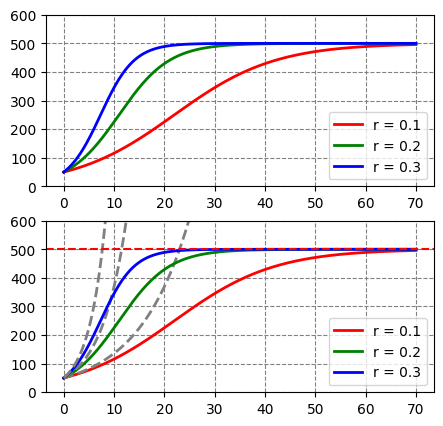

In [1]:
def exp(x, t, r):
  return r*x
def log(x, t, r, K):
  return r*x*(1-x/K)

rs = [0.1, 0.2, 0.3]
colors = ["red", "green", "blue"]
K = 500
x0 = 50

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

t = np.linspace(0, 70, 1000)
plt.figure(figsize = (5, 5), dpi = 100)
plt.subplot(2, 1, 1)
for r, color in zip(rs, colors):
  sol1=integrate.odeint(log, x0, t, args=(r,K))
  plt.ylim((0, 600))
  plt.plot(t, sol1, color = color, linewidth = 2, linestyle = '-', label = f'r = {r}')
  plt.grid(b=True,which='both',color='grey',linestyle='--')
plt.legend()

plt.subplot(2, 1, 2)
for r, color in zip(rs, colors):
  sol1 = integrate.odeint(log, x0, t, args= (r, K))
  sol2 = integrate.odeint(exp, x0, t, args = (r, )) 
  plt.plot(t, sol1, color = color, linewidth = 2, linestyle = '-', label = f'r = {r}')
  plt.plot(t, sol2, color = 'grey', linewidth = 2, linestyle = '--')
  plt.grid(b=True, which = 'both',color ='grey', linestyle = '--')
  plt.ylim((0, 600))
plt.axhline(y = K, color='r', linestyle='--')
plt.legend()

plt.show()



b) Zašto se eksponencijalni i logistički brže razilaze kada je stopa rasta $r$ veća? 

Ako je stopa rasta veca, tada populacija brze dolazi do tacke gde clan jednacine x/K vise nije << 1 tj. brze dolazi do svog nosivog kapaciteta

c) Napraviti novu Python skriptu (<font color='blue'>sunflower.py</font>) koja učitava fajl sunflower_data.csv i kroz eksperimentalne podatke provlači eksponencijalni i logistički model (reprodukovati grafik za slajda br. 6 u pripremnom fajlu).<br>

Skica postupka: Pomoću naredbe <font color='blue'>pd.read_csv</font> učitati fajl sunflower_data.csv. Nacrtati grafik zavisnosti kolone Height od kolone Age, pri čemu grafik treba da bude tipa scatter, sa markerima tamno crvene boje (DarkRed), veličine 10. 
Zatim, za $r = 0.1$ rešiti diferencijalne jednačine eksponencijalnog i logističkog rasta i dodati te dve krive na postojeći grafik. Uneti legendu, obeležiti ose grafika, postaviti grid, a limit za y osu postaviti da bude od 0 do 280. Vremensku osu napraviti od $tmin$ do $tmax$ u 200 tačaka. Za $tmin$ uzeti minimalni element kolone Age, za $tmax$ uzeti maksimalni element kolone Height. Za vrednost nosivog kapaciteta $K$, uzeti maksimalni element kolone Height. Za početni uslov $x(0)$ uzeti prvi element kolone Height koji odgovara prvom vremenskom trenutku za koji imamo podatke. 

<Figure size 800x800 with 0 Axes>

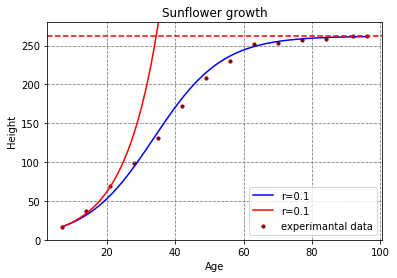

In [2]:
import pandas as pd
sunflower_data = pd.read_csv('sunflower_data.csv')
r = 0.1
K = 262.2
tmin = min(sunflower_data.Age)
tmax = max(sunflower_data.Age)
t = np.linspace(tmin, tmax, 200)
x0 = sunflower_data['Height'].iloc[0]
sol1 = integrate.odeint(log, x0, t, args=(r, K))
sol2 = integrate.odeint(exp, x0, t, args=(r,))
plt.figure(figsize=(8,8), dpi = 100)
plt.subplot=(2,3,1)
sunflower_data.plot(kind = 'scatter', x = 'Age', y = 'Height',s = 10, color = 'DarkRed',label = 'experimantal data')
plt.plot(t, sol1, "b-", label="r=0.1")
plt.plot(t, sol2, "r-", label="r=0.1")
plt.axhline(K, linestyle='--', color='red') 
plt.ylim((0,280))
plt.grid(b=True,which='both',color='grey',linestyle='--')

plt.legend() 
plt.title('Sunflower growth')
plt.show()

d) Sa grafika oceniti vremenski trenutak do koga eksponencijalni model dovoljno dobro prati eksperimentalne podatke.

# Poslednja tacka koju mozemo uociti na grafiku i koja se pratkicno poklapa sa eksponencijalnim modelom se nalazi oko vremenskog trenutka t = 20s

***
<font color='red'>Snimiti aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimiti fajl: Download as Notebook (.ipynb) </font>
***

#### __Zadatak 2__: Lotka-Volterra model

a) U okviru nove Python skripte (lv_model.py) formirati Python funkciju koja predstavlja sistem diferencijalih jednačina koje odgovaraju Lotka-Volterra modelu bez logističkog rasta prey vrste (lovine):

<br>$\frac{dx}{dt} = r_{prey}x - axy$<br>
<br>$\frac{dy}{dt} = -r_{predator}y + bxy$



Pomoću pandas biblioteke učitati fajl (lvm_data.csv) sa eksperimentalnim podacima o zečevima i lisicama. Na osnovu eksperimentalnih podataka dolazi se do sledećih vrednosti za parametre Lotka-Volterra sistema jednačina: $r_{prey} = 0.4807$, $a = 0.02482$, $r_{predator} = 0.9272$, $b = 0.02756$. Po uzoru na zadatak sa rastom suncokretove stabljike, zaključiti kako treba napraviti vremensku osu i postaviti početne uslove.

Nacrtati grafik na kome treba prikazati eksperimentalne podatke za zečeve (scatter plot, DarkRed tačke veličine 10) i krivu dinamike zečeva koja se dobija iz rešavanja Lotka-Volterra sistema (reprodukovati grafik sa slajda br. 10 iz pripremnog fajla). Označiti ose, postaviti grid i staviti legendu. 


<Figure size 600x400 with 0 Axes>

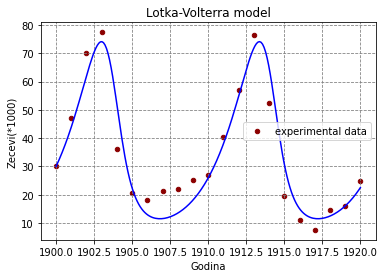

In [3]:
def lvm(y, t, r_prey, r_pred, a, b):
  y1, y2 = y
  return [r_prey*y1 - a*y1*y2, -r_pred*y2 + b*y1*y2]

lvm_data = pd.read_csv('lvm_data.csv')

r_prey = 0.4807
a = 0.02482
r_pred = 0.9272
b = 0.02756
tmin = lvm_data['Godina'].min()
tmax = lvm_data['Godina'].max()
t = np.linspace(tmin, tmax, 200)
puslov = [lvm_data['Zec'].iloc[0], lvm_data['Lisica'].iloc[0]]
sol = integrate.odeint(lvm, puslov, t, args=(r_prey, r_pred, a, b))

plt.figure(dpi = 100)
lvm_data.plot(kind = 'scatter', x = 'Godina', y = 'Zec', color = 'DarkRed', label = 'experimental data')


plt.plot(t, sol[:,0], 'b-')
plt.title('Lotka-Volterra model')
plt.ylabel('Zecevi(*1000)')
plt.grid(b=True,which='both',color='grey',linestyle='--')

plt.legend()
plt.show()

Nacrtati grafik na kome treba prikazati eksperimentalne podatke za lisice (scatter plot, DarkRed tačke veličine 10) i krivu dinamike lisica koja se dobija iz rešavanja Lotka-Volterra sistema (reprodukovati grafik sa slajda br. 11 iz pripremnog fajla). Označiti ose, postaviti grid i staviti legendu.

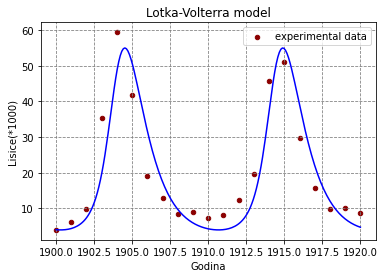

In [4]:
lvm_data.plot(kind = 'scatter', x = 'Godina', y = 'Lisica', color = 'DarkRed', label = 'experimental data')

plt.plot(t, sol[:,1], 'b-')
plt.title('Lotka-Volterra model')
plt.ylabel('Lisice(*1000)')
plt.grid(b=True,which='both',color='grey',linestyle='--')

plt.legend()
plt.show()

Nacrtati grafik na kome treba prikazati krive dinamike zečeva i lisica koje se dobijaju iz rešavanja Lotka-Volterra sistema na novoj vremenskoj skali koja je produžena za još 50 godina u odnosu na prethodnu (reprodukovati grafik sa slajda br. 12 iz pripremnog fajla). Označiti ose, postaviti grid i staviti legendu. 

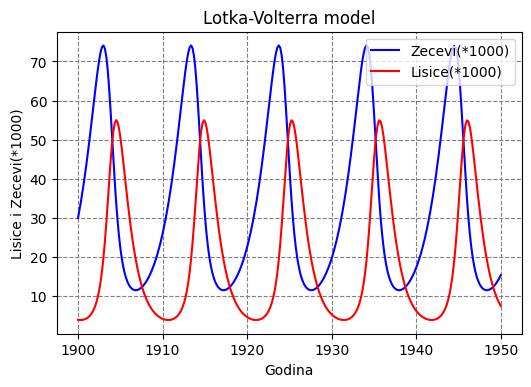

In [5]:
t = np.linspace(1900, 1950, 300)
puslov = [lvm_data['Zec'].iloc[0], lvm_data['Lisica'].iloc[0]]
sol = integrate.odeint(lvm, puslov, t, args=(r_prey, r_pred, a, b))
plt.figure(dpi = 100)
plt.plot(t, sol[:,0], 'b-', label = 'Zecevi(*1000)')
plt.plot(t, sol[:,1], 'r-', label = 'Lisice(*1000)')
plt.title('Lotka-Volterra model')
plt.xlabel('Godina')
plt.ylabel('Lisice i Zecevi(*1000)')
plt.grid(b = True, which = 'both', color = 'grey', linestyle = '--')
plt.legend(loc = 'upper right')
plt.show()

Proceniti ugaonu frekvenciju oscilovanja lisica, kao i zečeva i proveriti da li se slaže sa formulom datom na slajdu br. 12 iz pripremnog fajla.

Posto je perioda sa grafika otprilike 1/10 godina, kada to pomnozimo sa dva pi otprilike dobijamo 0.6, sto se poklapa sa formulom

Nacrtati fazni dijagram koji odgovara prethodnom vremenskom dijagramu (reprodukovati grafik sa slajda br. 13 iz pripremnog fajla). Označiti ose, postaviti grid i staviti legendu. Uneti verikalnu i horizonatlnu isprekidanu liniju crvene boje, tako da se u preseku definiše stacionarno stanje ovakvih oscilacija. 

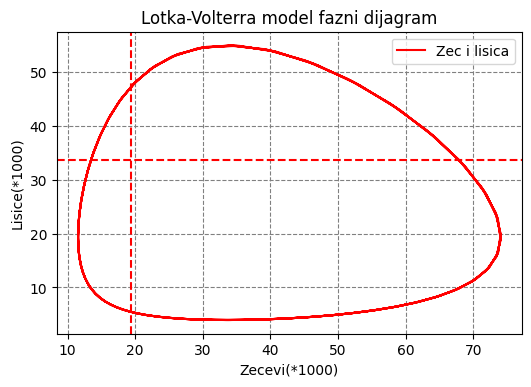

In [6]:
sol = integrate.odeint(lvm, puslov, t, args=(r_prey, r_pred, a, b))

plt.figure(dpi = 100)
plt.plot(sol[:,0], sol[:,1],"r-",label="Zec i lisica");
plt.xlabel("Zecevi(*1000)");
plt.ylabel("Lisice(*1000)");
plt.title('Lotka-Volterra model fazni dijagram')
plt.axhline(r_pred/b, linestyle='--',color='red'); 
plt.axvline(r_prey/a, linestyle='--',color='red') ;
plt.grid(b=True,which='both',color='grey',linestyle='--')
plt.legend()
plt.show()

Kog oblika je fazni dijagram i zašto?

Fazni dijagram predstvalja zatvorenu kruznu liniju zbog toga jer je sistem nalik oscilatoru bez prigusenja

b)	Simulirati Lotka-Volterra model sa logističkim rastom za $prey$ vrstu:

<br>$\frac{dx}{dt} = r_{prey}(1-\frac{x}{K}) - axy$<br>
<br>$\frac{dy}{dt} = -r_{predator}y + \epsilon bxy$

U Python skripti (<font color='blue'>lv_logistic_model.py</font>) reprodukovati grafike sa slajda br. 15. iz pripremnog fajla. Za početne uslove koji odgovaraju početnim uslovima iz prethodnog zadatka, za parametre koji odgovaraju parametrima iz prethodnog zadatka (uz dodatak $K = 250$, $\epsilon = 0.9$), na vremenskoj skali od 1900. do 2100. godine u 1000 ekvidistantnih tačaka, rešavati sistem diferencijalnih jednačina. 

Nacrtati vremenski dijagram lisica i zečeva na kome treba označiti ose grafika, postaviti grid i uneti legendu.

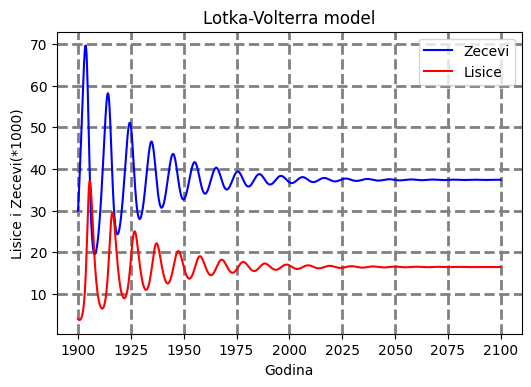

In [7]:
def lvm_log(y, t, r_prey, r_pred, a, b, K, e):
    y1, y2 = y
    return [r_prey*y1*(1 - y1/K) - a*y1*y2, -r_pred*y2 + e*b*y1*y2]
K=250
e=0.9
r_prey = 0.4807
a = 0.02482
r_pred = 0.9272
b = 0.02756
puslov = [lvm_data['Zec'].iloc[0], lvm_data['Lisica'].iloc[0]]
t = np.linspace(1900, 2100, 1000)

sol = integrate.odeint(lvm_log, puslov, t, args =(r_prey, r_pred, a, b, K, e)) 
plt.figure(dpi = 100)
plt.title('Lotka-Volterra model')
plt.ylabel('Lisice i Zecevi(*1000)')
plt.xlabel('Godina')
plt.plot(t, sol[:,0], 'b-', label = 'Zecevi')
plt.plot(t, sol[:,1], 'r-', label = 'Lisice')
plt.grid(b = True, which = 'both', color = 'grey', linestyle = '--', linewidth = 2)
plt.legend()
plt.show()


Nacrtati fazni dijagram dinamike lisica i zečeva, na kome treba označiti ose grafika i postaviti grid.

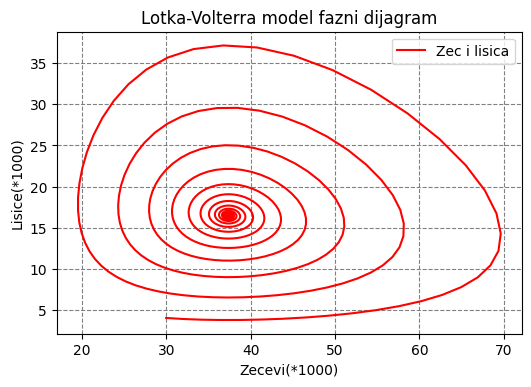

In [8]:
plt.figure(dpi = 100)
plt.plot(sol[:,0], sol[:,1],"r-",label="Zec i lisica");
plt.title('Lotka-Volterra model fazni dijagram')
plt.xlabel("Zecevi(*1000)");
plt.ylabel("Lisice(*1000)");
plt.grid(b=True,which='both',color='grey',linestyle='--')
plt.legend()
plt.show()

Kog oblika je fazni dijagram i zašto?

Fazni dijagram je oblika spirale koja ide ka unutra do svog stacionarnog stanja. To je zato sto kada u nas model ukljucimo i nosivi kapacitet, model se ponasasa kao prigusena oscilacija sve dok ne dodje do ravnoteznog stanja.